# Задание #3 Data Analysis

## Описание предоставленных данных
Фрейм test_price состоит из:
* Датасет - каталог товара с данными во вложении
* id: товар
* Brand:Бренд
* Category: категория
* SubCategory: подкатегория
* SellPrice: цена продажи

### Библиотеки Python

* [Pandas](http://pandas.pydata.org/)
- [Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [Easier data analysis in Python with pandas](http://www.dataschool.io/easier-data-analysis-with-pandas/)

## Разминка
**Как и в предыдущей лабораторной здесь запрещено использовать циклы, если это специально не оговорено.**
1. Описательная статистика
* Вывести самый частотный бренд, категорию, подкатегорию
*  Вывести по ним размах цен
*  Вывести Среднее значение или медиану (выбор обосновать)

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('./test_price/test_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672269 entries, 0 to 672268
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             672269 non-null  int64  
 1   Brand          672269 non-null  int64  
 2   SubCategoryNr  672269 non-null  int64  
 3   Category       672269 non-null  int64  
 4   SellPrice      672269 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 25.6 MB


In [6]:
df.head()

,id,Brand,SubCategoryNr,Category,SellPrice
0,452798,79,3488,36,10.92
1,599859,79,1485,36,112.04
2,183475,79,1485,36,25.09
3,552471,79,3282,36,1.40
4,589285,79,3282,36,2.28


In [5]:
brand = df["Brand"].value_counts().index[0]
category = df["Category"].value_counts().index[0]
subcategory = df["SubCategoryNr"].value_counts().index[0]
f'most popular brand number: {brand}, most popular category number: {category}, most popular subcategory number: {subcategory} '

'most popular brand number: 369, most popular category number: 13, most popular subcategory number: 82 '

In [6]:
maxPrice = df[df["Brand"] == brand].max()['SellPrice']
minPrice = df[df["Brand"] == brand].min()['SellPrice']
Pricerange = maxPrice - minPrice
print(f'The range of values for brand {brand} is equal to {Pricerange}')

maxPrice = df[df["Category"] == category].max()['SellPrice']
minPrice = df[df["Category"] == category].min()['SellPrice']
Pricerange = maxPrice - minPrice
print(f'The range of values for category {category} is equal to {Pricerange}')

maxPrice = df[df["SubCategoryNr"] == subcategory].max()['SellPrice']
minPrice = df[df["SubCategoryNr"] == subcategory].min()['SellPrice']
Pricerange = maxPrice - minPrice
print(f'The range of values for subcategory {subcategory} is equal to {Pricerange}')

The range of values for brand 369 is equal to 2712.32
The range of values for category 13 is equal to 1735.56
The range of values for subcategory 82 is equal to 1207.98


In [7]:
meanBrandPrice = df[df["Brand"] == brand]['SellPrice'].mean()
medianBrandPrice = df[df["Brand"] == brand]['SellPrice'].median()
print(f'For brand: {brand} mean selling price: {meanBrandPrice}, median selling price: {medianBrandPrice}')

meanCategoryPrice = df[df["Category"] == category]['SellPrice'].mean()
medianCategoryPrice = df[df["Category"] == category]['SellPrice'].median()
print(f'For category: {category} mean selling price: {meanCategoryPrice}, median selling price: {medianCategoryPrice}')

meanSubCategoryPrice = df[df["SubCategoryNr"] == subcategory]['SellPrice'].mean()
medianSubCategoryPrice = df[df["SubCategoryNr"] == subcategory]['SellPrice'].median()
print(f'For subcategory: {subcategory} mean selling price: {meanSubCategoryPrice}, median selling price: {medianSubCategoryPrice}')

For brand: 369 mean selling price: 36.0158964282161, median selling price: 16.73
For category: 13 mean selling price: 36.585712636011586, median selling price: 26.03
For subcategory: 82 mean selling price: 41.006407009934456, median selling price: 32.16


Для всех случаев значения среднего и медианы различаются, можно сделать вывод, что есть выбросы и лучше ориентироваться по медианному значению


2. Сделать график Распределения иерархий(бренд, категория, подкатегория) по ценам
• Распределение (средняя цена / бренд) - берем топ 25-35 брендов
• Распределение (средняя цена / категория) берем топ 25-35 категорий
• Распределение (средняя цена / подкатегория) берем топ 25-35 подкатегорий

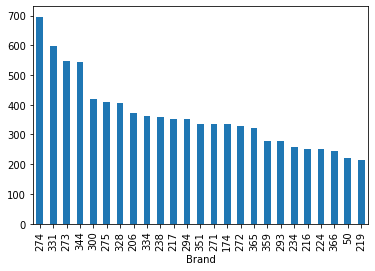

In [8]:
df1 = df.groupby('Brand')['SellPrice'].mean().sort_values(ascending = False).iloc[0:25] 
df1.plot.bar();

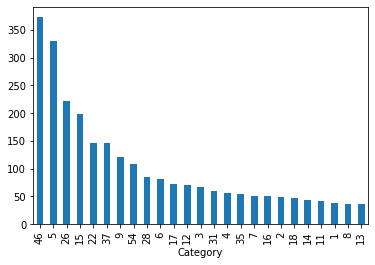

In [9]:
df2 = df.groupby('Category')['SellPrice'].mean().sort_values(ascending = False).iloc[0:25] 
df2.plot.bar();

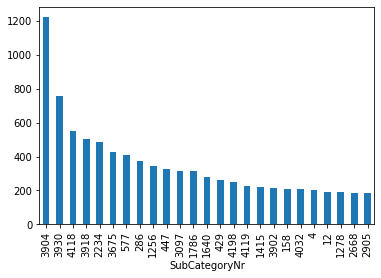

In [61]:
df3 = df.groupby('SubCategoryNr')['SellPrice'].mean().sort_values(ascending = False).iloc[0:25] 
df3.plot.bar();


3. Построить диаграмму размаха boxplot иерархий по ценам
* Также как в задание выше (бренд, категория, подкатегория)

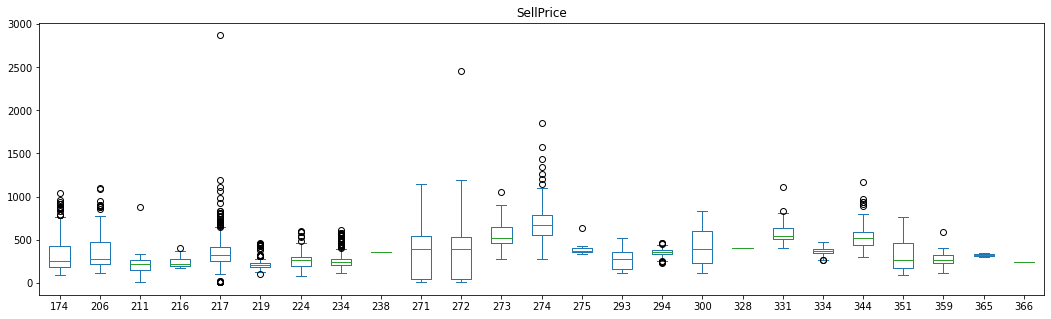

In [120]:
top_brands = df.groupby('Brand')['SellPrice'].median().sort_values(ascending = False).index[:25]
df4 = df[df['Brand'].isin(top_brands)]
ax = df4.plot.box(column="SellPrice", by="Brand", figsize=(18,5))

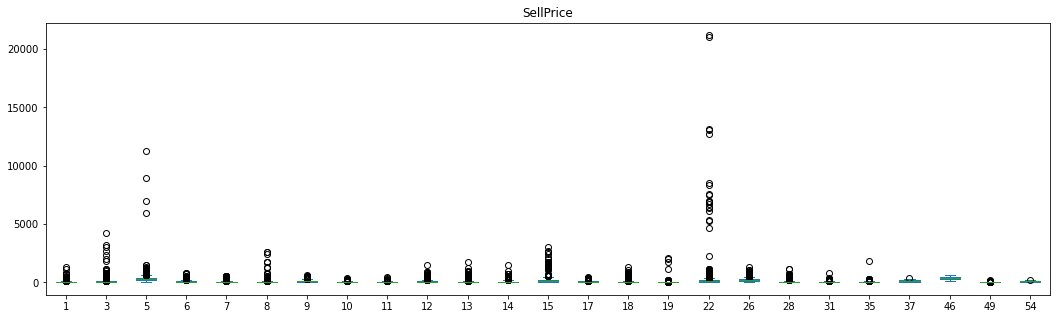

In [123]:
top_categories = df.groupby('Category')['SellPrice'].median().sort_values(ascending = False).index[:25]
df5 = df[df['Category'].isin(top_categories)]
ax = df5.plot.box(column="SellPrice", by="Category", figsize=(18,5))

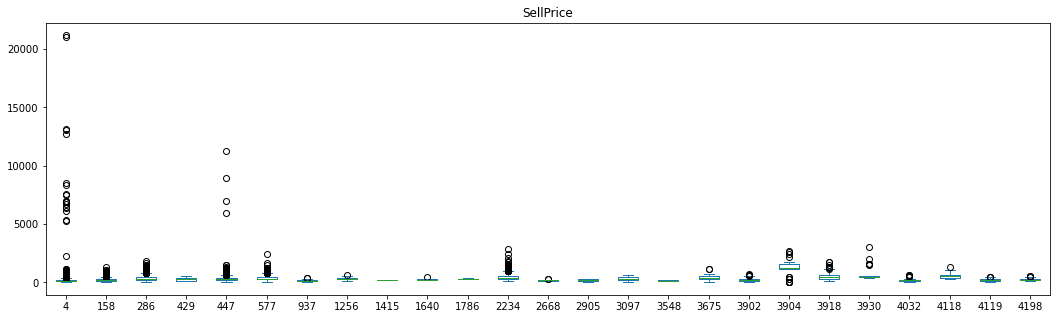

In [126]:
top_subcategories = df.groupby('SubCategoryNr')['SellPrice'].median().sort_values(ascending = False).index[:25]
df6 = df[df['SubCategoryNr'].isin(top_subcategories)]
ax = df6.plot.box(column="SellPrice", by="SubCategoryNr", figsize=(18,5))


4. Построить распределение интервалов цен по самому частотному бренду, категории, подкатегории (шаг интервала обосновать)

step for intervals: 180


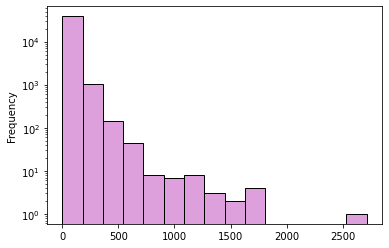

In [57]:
import math
df7 = df[df["Brand"] == brand]['SellPrice']
k = int(1 + 3.22 * math.log10(df7.shape[0]))
#количество интервалов опряделяем по правилу Стерджеса
iv_step = int((df[df["Brand"] == brand].max()['SellPrice'] - df[df["Brand"] == brand].min()['SellPrice']) / k)
print(f'step for intervals: {iv_step}')
df7.plot.hist(bins=k, log=True,color = 'plum', edgecolor = 'black');

step for intervals: 96


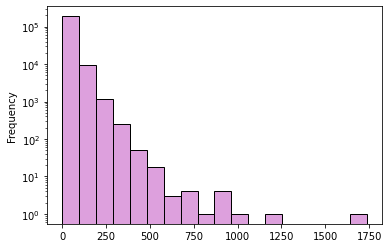

In [58]:
df8 = df[df["Category"] == category]['SellPrice']
k = int(1 + 3.22 * math.log10(df8.shape[0]))
iv_step = int((df[df["Category"] == category].max()['SellPrice'] - df[df["Category"] == category].min()['SellPrice']) / k)
print(f'step for intervals: {iv_step}')
df8.plot.hist(bins=k, log=True,color = 'plum', edgecolor = 'black');

step for intervals: 67


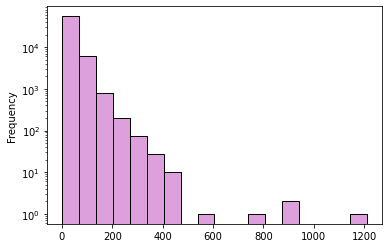

In [59]:
df9 = df[df["SubCategoryNr"] == subcategory]['SellPrice']
k = int(1 + 3.22 * math.log10(df8.shape[0]))
iv_step = int((df[df["SubCategoryNr"] == subcategory].max()['SellPrice'] - df[df["SubCategoryNr"] == subcategory].min()['SellPrice']) / k)
print(f'step for intervals: {iv_step}')
df9.plot.hist(bins=k, log=True,color = 'plum', edgecolor = 'black');


5. Сделать сегментацию по уровням цен по иерархии (внутри Brand/Category/SubCategory)
* Дополнительные знания найденные в датасете и инсайты приветствуются.


Честно говоря, не совсем понял задачу